In [1]:
import albumentations as A
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from glob import glob
# from PIL import Image
# import cv2
# import sys
# import pickle

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#yolo 모델에 맞는 좌표로 되어 있는 좌표 데이터들을 잠시 augmentation하기 위해 x,y좌표로 변환해주는 함수
def yolo_to_xml_bbox(bbox, image): 
    # x_center, y_center width, heigth
    h, w, c = image.shape
    w_half_len = (bbox[0][2] * w) / 2
    h_half_len = (bbox[0][3] * h) / 2
    xmin = int((bbox[0][0] * w) - w_half_len)
    ymin = int((bbox[0][1] * h) - h_half_len)
    xmax = int((bbox[0][0] * w) + w_half_len)
    ymax = int((bbox[0][1] * h) + h_half_len)
    im_class = int(int(bbox[0][-1]))
    return [(xmin, ymin, xmax, ymax, im_class)]

In [3]:
def setting_yolo_order(list_):
    a, b, c, d,e = list_
    return [e,a,b,c,d]

In [10]:
images_names = glob('image_data/crut/*.jpg')
labels_names = glob('image_data/crut_label/*.txt')
images_names.sort()
labels_names.sort()

In [11]:
print(len(images_names),len(labels_names))

117 117


(22, 94, 129, 290, 0)


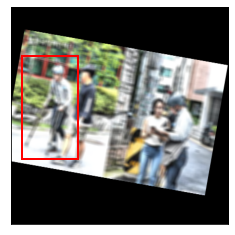

(72, 63, 238, 414, 0)


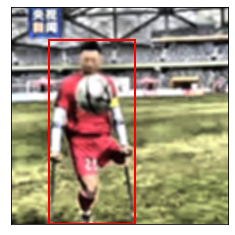

(81, 99, 242, 326, 0)


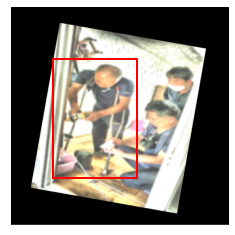

(167, 94, 341, 335, 0)


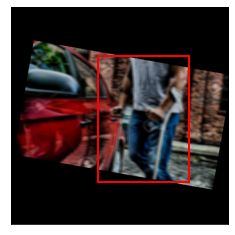

(194, 152, 279, 363, 0)


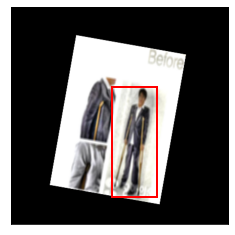

(184, 86, 396, 340, 0)


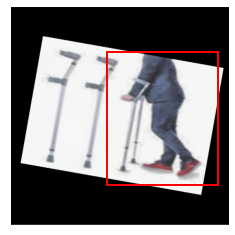

(55, 41, 238, 404, 0)


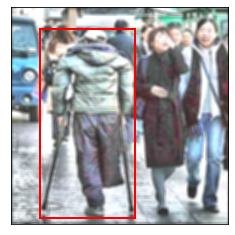

(209, 116, 334, 387, 0)
(157, 184, 208, 297, 1)


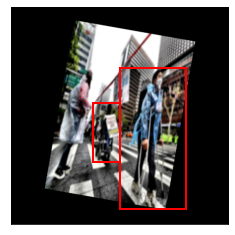

(121, 73, 280, 384, 0)


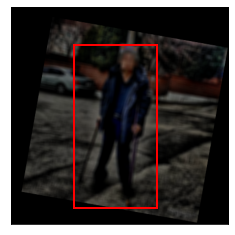

(178, 69, 256, 331, 0)


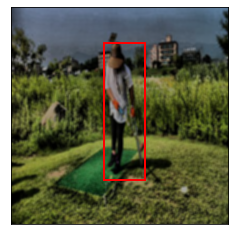

(81, 125, 137, 377, 0)
(341, 114, 390, 415, 0)
(209, 144, 259, 389, 0)
(237, 136, 288, 398, 0)
(27, 141, 83, 395, 0)
(265, 124, 340, 415, 0)
(367, 145, 415, 415, 0)


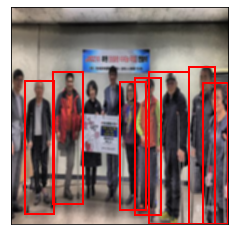

(214, 183, 291, 372, 0)
(304, 191, 363, 375, 0)
(59, 232, 118, 393, 1)


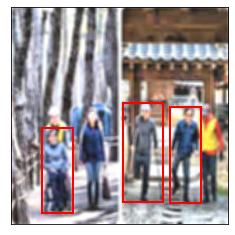

(68, 24, 233, 401, 0)


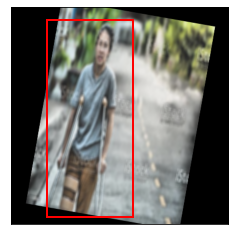

(175, 0, 391, 367, 0)


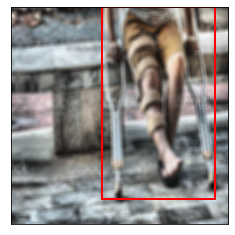

(86, 0, 323, 368, 0)


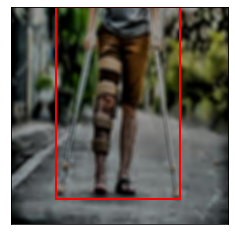

(116, 21, 410, 391, 0)
(15, 21, 130, 394, 0)


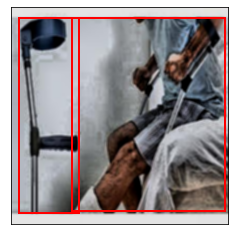

(13, 92, 69, 391, 0)
(201, 91, 273, 394, 0)


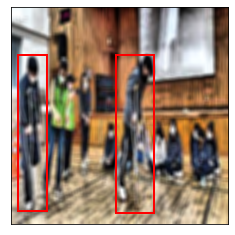

(114, 64, 321, 370, 0)


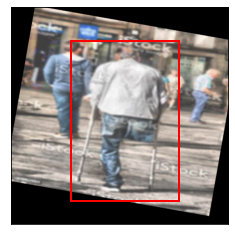

(155, 72, 416, 342, 0)


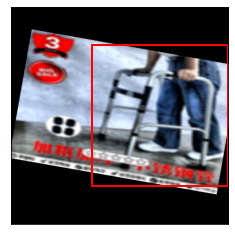

(55, 41, 416, 360, 0)


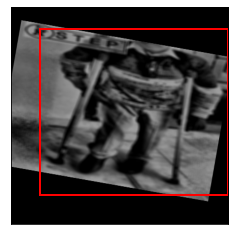

(181, 116, 251, 265, 0)


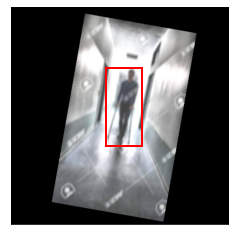

(139, 97, 286, 315, 0)


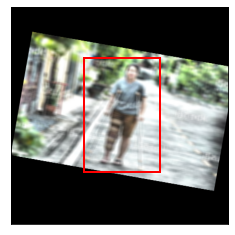

(46, 0, 277, 415, 0)


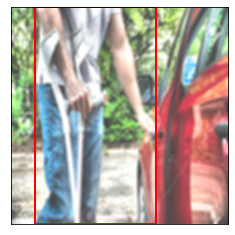

(117, 35, 194, 314, 1)
(253, 46, 353, 380, 0)


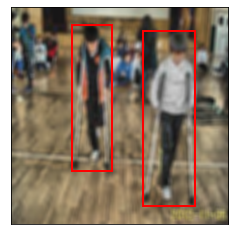

(266, 29, 385, 399, 0)
(138, 95, 224, 407, 1)


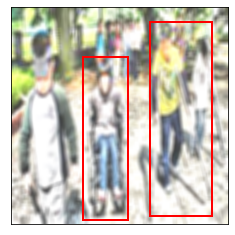

(153, 97, 268, 335, 0)


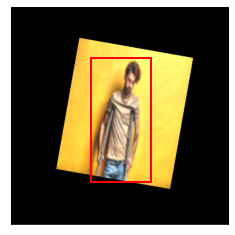

(117, 77, 325, 352, 0)


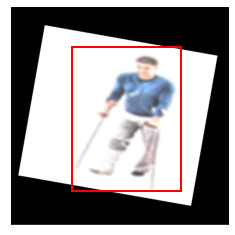

(166, 71, 235, 357, 0)


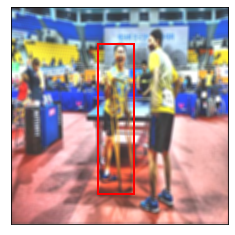

(144, 12, 367, 415, 0)
(85, 30, 245, 414, 0)


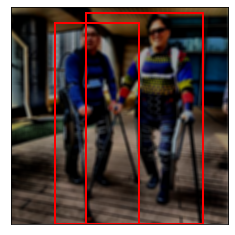

(69, 83, 169, 291, 0)


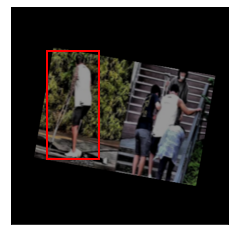

(120, 105, 344, 349, 0)


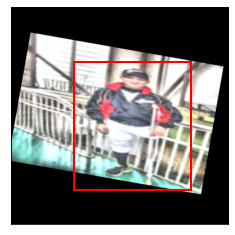

(128, 31, 300, 398, 0)


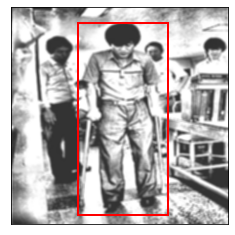

(145, 1, 265, 372, 0)


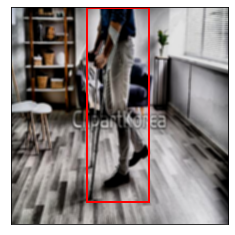

(226, 104, 360, 400, 0)


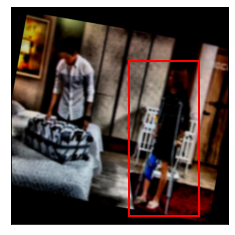

(155, 0, 304, 392, 0)


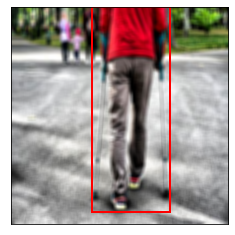

(178, 84, 286, 356, 0)


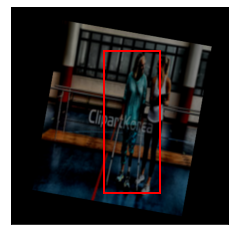

(46, 21, 230, 356, 0)


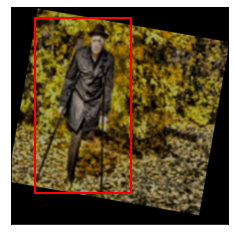

(113, 0, 290, 401, 0)


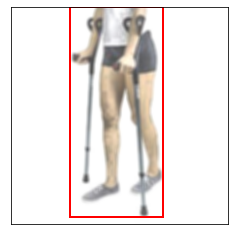

(142, 97, 303, 398, 0)


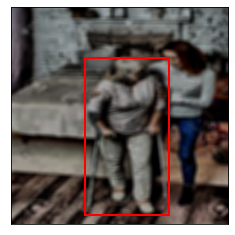

(205, 44, 297, 369, 0)


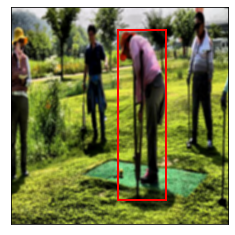

(160, 124, 281, 365, 0)
(219, 104, 348, 416, 0)


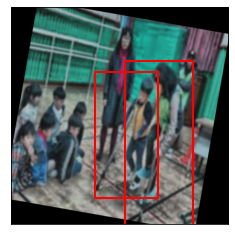

(156, 75, 311, 330, 0)


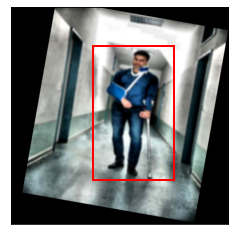

(201, 82, 324, 370, 0)
(266, 96, 363, 377, 0)


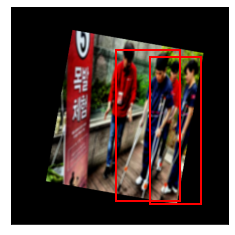

(129, 13, 296, 414, 0)


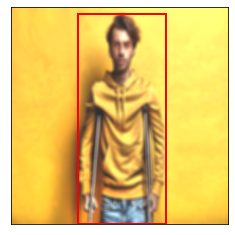

(97, 51, 239, 344, 0)


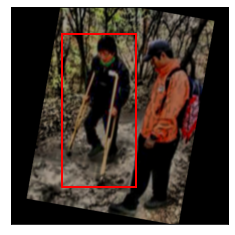

(107, 141, 188, 300, 0)
(192, 147, 284, 304, 0)


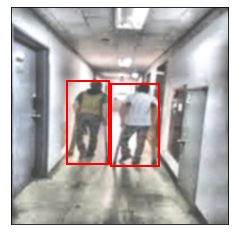

(131, 0, 328, 414, 0)


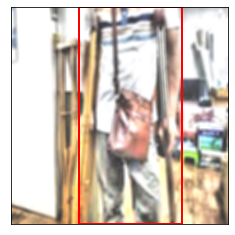

(160, 88, 202, 222, 0)
(120, 96, 158, 223, 0)
(286, 100, 334, 221, 0)
(213, 98, 251, 225, 0)
(20, 105, 69, 264, 0)
(360, 114, 414, 323, 0)


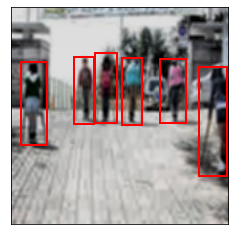

(142, 12, 279, 391, 0)


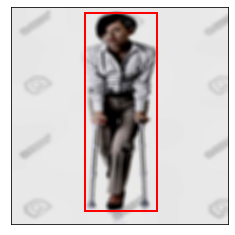

(99, 158, 251, 302, 0)


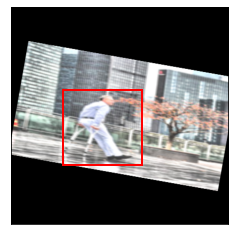

(124, 115, 262, 414, 0)


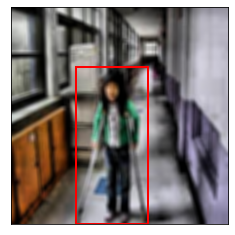

(151, 0, 266, 323, 0)


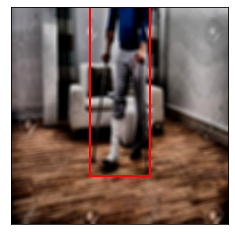

(79, 50, 147, 388, 0)


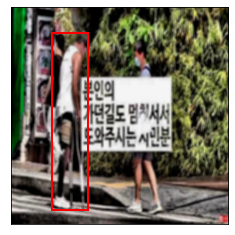

(27, 13, 396, 413, 0)


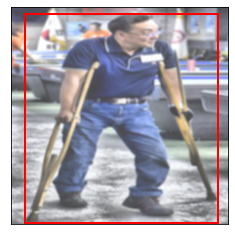

(169, 49, 322, 391, 0)


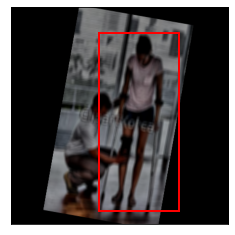

(248, 0, 362, 301, 0)


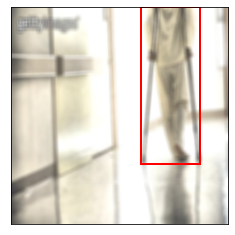

(99, 100, 204, 354, 0)


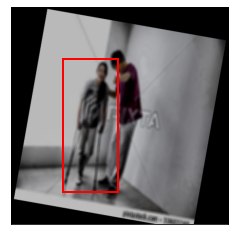

(86, 93, 236, 304, 0)


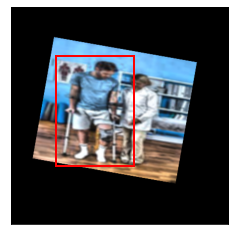

(71, 98, 148, 373, 0)


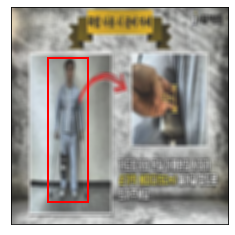

(41, 2, 340, 386, 0)


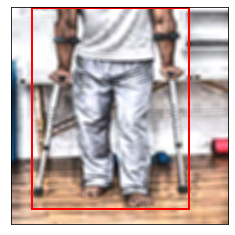

(80, 163, 186, 415, 0)
(178, 245, 289, 415, 1)


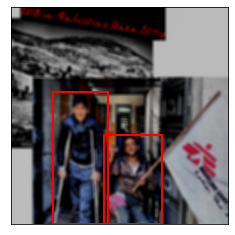

(120, 103, 170, 306, 0)


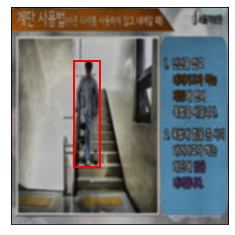

(110, 104, 245, 377, 0)


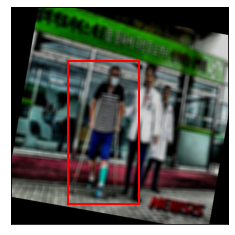

(272, 28, 363, 403, 0)


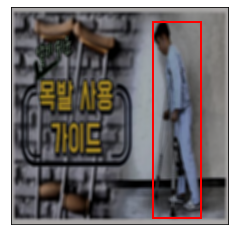

(174, 71, 267, 321, 0)


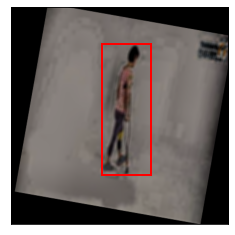

(92, 78, 310, 323, 0)


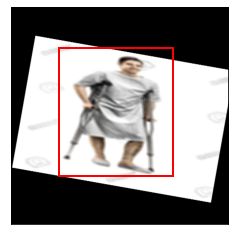

(129, 116, 282, 347, 0)


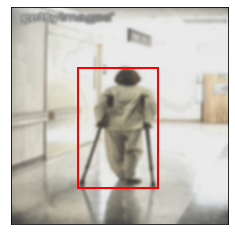

(199, 127, 410, 355, 0)


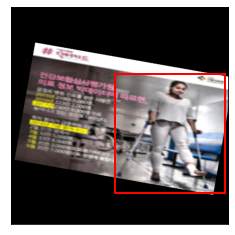

(63, 7, 303, 398, 0)


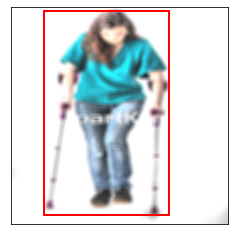

(114, 57, 282, 327, 0)


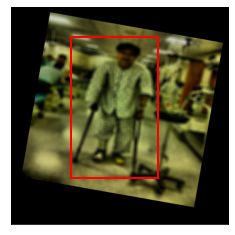

(100, 77, 340, 308, 0)


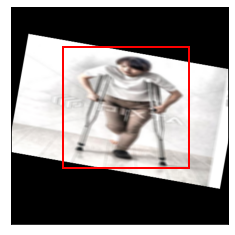

(73, 59, 277, 399, 0)


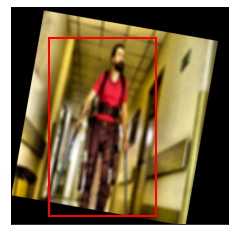

(61, 86, 248, 326, 0)


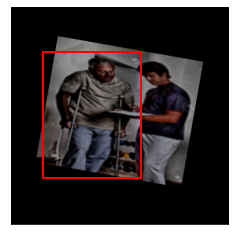

(86, 0, 350, 416, 0)


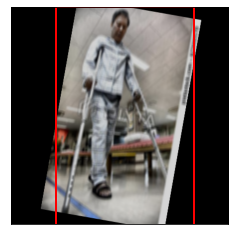

(97, 126, 175, 345, 0)


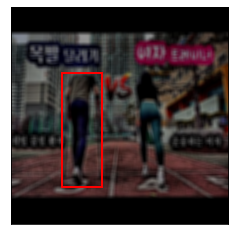

(160, 13, 245, 414, 0)


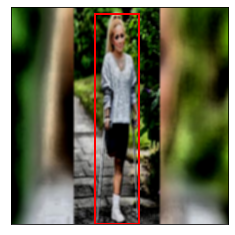

(302, 33, 376, 381, 0)


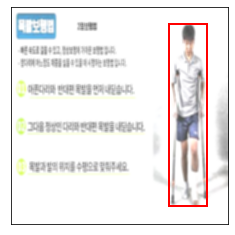

(175, 26, 415, 415, 0)


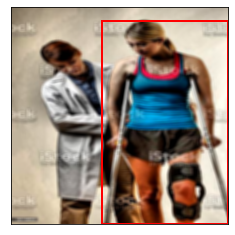

(252, 10, 392, 411, 0)


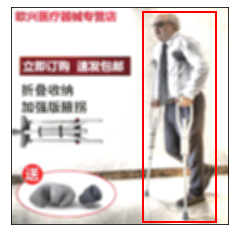

(72, 68, 282, 349, 0)


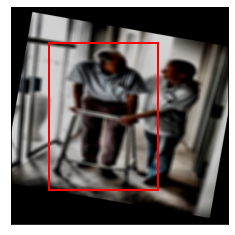

(127, 1, 304, 415, 0)


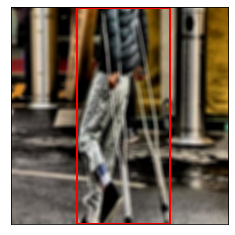

(102, 141, 242, 378, 0)


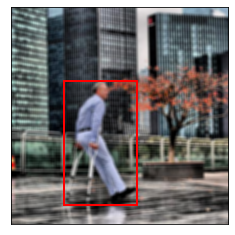

(61, 0, 160, 407, 0)


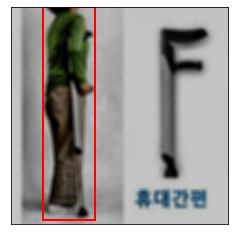

(142, 71, 274, 354, 0)


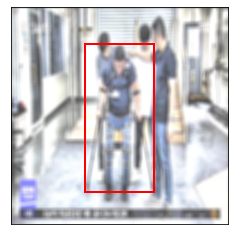

(61, 15, 257, 391, 0)


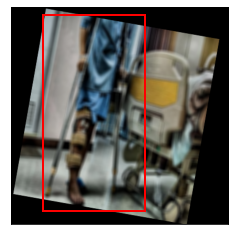

(73, 71, 351, 326, 0)


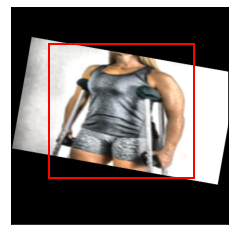

(266, 65, 358, 272, 0)
(51, 67, 119, 389, 0)


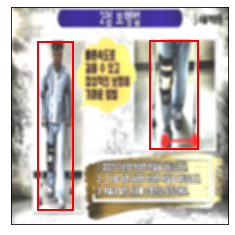

(229, 0, 333, 287, 0)


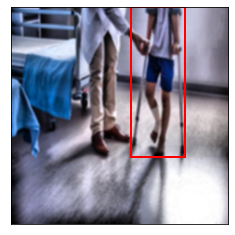

(142, 62, 289, 354, 0)


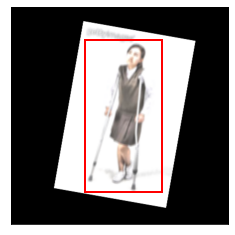

(82, 50, 246, 345, 0)


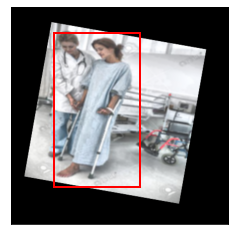

(209, 71, 320, 340, 0)


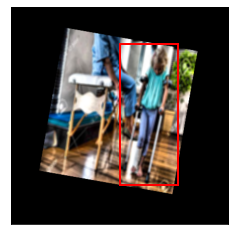

(13, 1, 226, 396, 0)


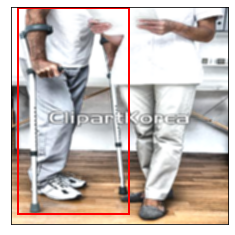

(112, 68, 343, 353, 0)


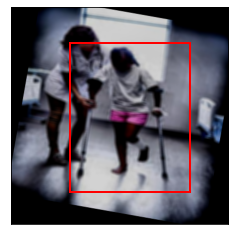

(146, 23, 307, 382, 0)


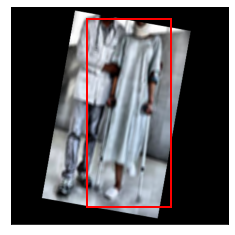

(209, 24, 317, 377, 0)


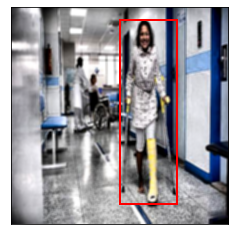

(193, 53, 298, 270, 0)


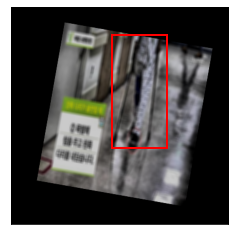

(56, 11, 176, 400, 0)


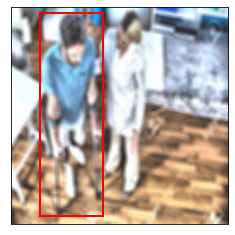

(141, 29, 346, 399, 0)


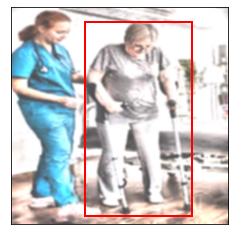

(63, 41, 354, 399, 0)


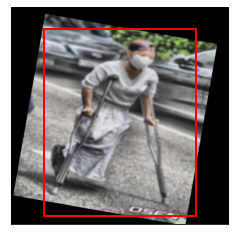

(55, 87, 247, 349, 0)


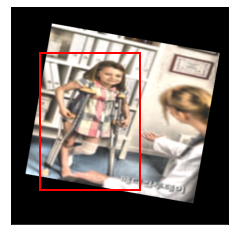

(1, 20, 229, 379, 0)


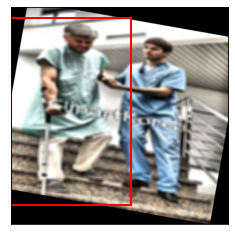

(196, 100, 288, 349, 0)


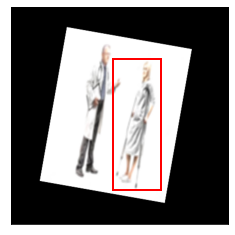

(87, 118, 252, 311, 0)


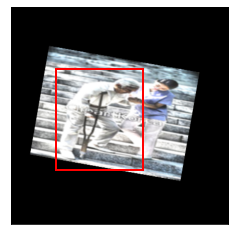

(145, 64, 255, 356, 0)


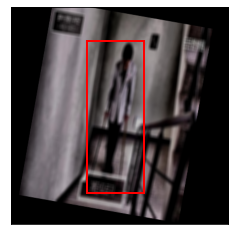

(99, 86, 281, 363, 0)


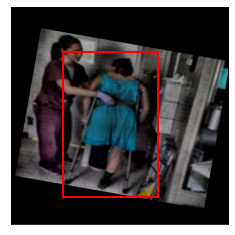

(34, 56, 163, 362, 0)


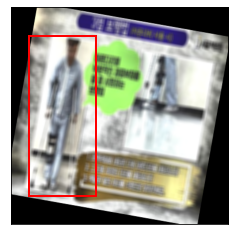

(110, 129, 282, 315, 0)


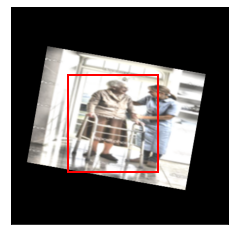

(152, 0, 328, 361, 0)


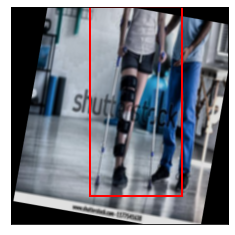

(183, 61, 357, 249, 0)


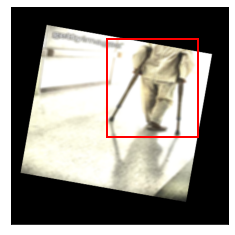

(132, 86, 245, 292, 0)


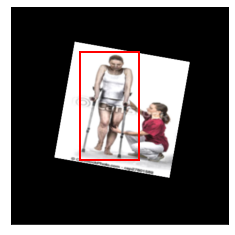

(58, 53, 241, 305, 0)


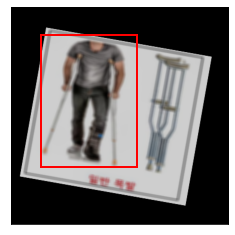

(65, 54, 211, 331, 0)


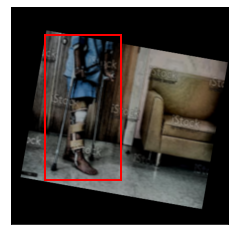

(77, 173, 144, 267, 0)


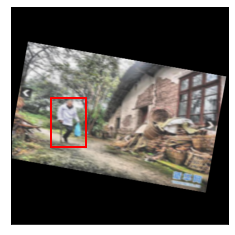

(70, 57, 199, 273, 0)


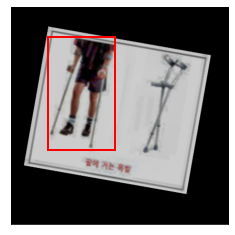

(122, 119, 181, 281, 0)


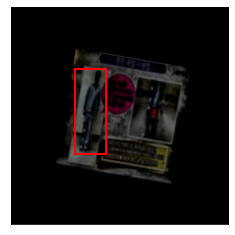

(148, 25, 279, 410, 0)


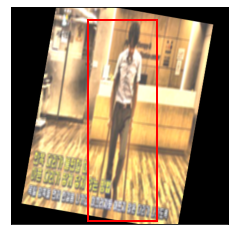

(194, 49, 352, 379, 0)


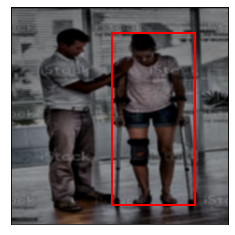

In [13]:
for i in range(len(images_names)):
    image = plt.imread(images_names[i])
    label = list(open(labels_names[i]))
    
    #이미지 내에 객체가 1개일 경우
    if len(label) == 1:
        label_list = label[0].split()
        bbox = [float(x) for x in label_list]
        class_, x, y, width, height = bbox
        bbox = [[x, y, width, height,class_]]

        #이미지 변환
        transform = A.Compose([
            A.RandomBrightnessContrast(brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3), p=1), #밝기 정도
            A.Blur(p=1, blur_limit=(5, 10)), #흐림 정도
            A.Affine(
                         translate_px={'x':(-10, 10), 'y':(-10, 10)},
                         scale = (0.5, 1),
                         rotate=(10, 10)) #affine 변환 - 위치 회전 (선형변환에 위치까지 변환시킨다)
        ], bbox_params=A.BboxParams(format = 'yolo'))

        transformed = transform(image=image, bboxes=bbox)
        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']
        

        transformed_bbox = setting_yolo_order(transformed_bboxes[0]) #이중리스트로 구성되어있어서 0번째 리스트를 출력하는 것임.
        transformed_bbox = np.array(transformed_bbox).reshape(1, 5)
        
        #변환 이미지 데이터, box 좌표 저장
        np.savetxt('image_data/crut_aug_label/'+'aug_cr.'+labels_names[i].split('/')[-1], transformed_bbox, delimiter = ' ', fmt = '%lf')
        array_img = Image.fromarray(transformed_image)
        array_img.save('image_data/crut_aug/'+'aug_cr.'+images_names[i].split('/')[-1])
     
        #변환 이미지 확인
        trans_xml_bboxs = yolo_to_xml_bbox(transformed_bboxes, transformed_image)
        # 이미지 출력
        plt.imshow(transformed_image)

        # bounding box 그리기
        for trans_xml_bbox in trans_xml_bboxs:
            print(trans_xml_bbox)
            xmin, ymin, xmax, ymax, category = trans_xml_bbox
            rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='red', fill=False)
            ax = plt.gca()
            ax.add_patch(rect)

        plt.xticks([]); plt.yticks([])
        plt.show()
        
    #이미지 내에 객채가 2개 이상일 경우
    else:
        bbox = []
        for x in range(len(label)):
            str_label = label[x].split()
            bbox_float = [float(y) for y in str_label]
            class_, x, y, width, height = bbox_float
            bbox.append([x,y,width,height,class_])
        
        #이미지 변환
        transform = A.Compose([
            A.RandomBrightnessContrast(brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3), p=1),
            A.Blur(p=1, blur_limit=(5, 10)),
            A.Affine(
                         translate_px={'x':(-10, 10), 'y':(-10, 10)},
                         scale = (0.5, 1),
                         rotate=(10, 10))
        ], bbox_params=A.BboxParams(format='yolo'))

        transformed = transform(image=image, bboxes=bbox)
        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']

        transformed_bboxes_list = []
        for b in range(len(transformed_bboxes)):
            transformed_bboxes_list.append(setting_yolo_order(transformed_bboxes[b]))

        transformed_bbox = np.array(transformed_bboxes_list).reshape(len(transformed_bboxes_list), 5)

        np.savetxt('image_data/crut_aug_label/'+'aug_cr.'+labels_names[i].split('/')[-1], transformed_bbox, delimiter = ' ', fmt = '%lf') 
        array_img = Image.fromarray(transformed_image)
        array_img.save('image_data/crut_aug/'+'aug_cr.'+images_names[i].split('/')[-1])
        
        #변환 이미지 확인
        #객체가 많기 때문에 리스트에 각 boxing 좌표를 넣어 그리도록 한다.
        trans_xml_bboxs = []
        for xml in range(len(label)):
            trans_xml_bboxs.append(yolo_to_xml_bbox([transformed_bboxes[xml]], transformed_image))

        # 이미지 출력
        plt.imshow(transformed_image)

        # bounindg box 그리기
        for trans_xml_bbox in trans_xml_bboxs:
            print(trans_xml_bbox[0])
            
            xmin, ymin, xmax, ymax, category = trans_xml_bbox[0]
            rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='red', fill=False)
            ax = plt.gca()
            ax.add_patch(rect)

        plt.xticks([]); plt.yticks([])
        plt.show()
        